# BLACK FRIDAY 
Ekaterina Staroverova and Olesia Lacko

Key attribute - gender, supportive attributes - age, Stay_In_Current_City_Years 

Analysis of Black Friday data set consisted of information about customers, suppliers, types of supermarkets.

Revealing customers behavior patterns

Understanding and explaining of dependencies and relationships

In order to perform pre-data analysis, we need to import the following packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
#General information and tuning

Now we will define and download our data. To be sure that everything was imported good, we will show the first five rows of the data set. 

In [3]:
data = pd.read_csv('train.csv') #download data

In [4]:
data.head() #first 5 row of data

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
data.shape

(550068, 12)

#### Our data set has been taken from the Kaggle
https://www.kaggle.com/abhisingh10p14/black-friday

It represents the customers' behavior and consists of several columns:

- User ID - unique ID. It's important to notice that one customer can buy several times

- Product_ID - unique ID of each product.

- Gender - M (male) F(female)

- Age - different categories: 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+

- Stay_In_Current_City_Years - how many years user lives in this city

- Occupation - how many years the person live in the USA

- City_Category - 'A','B','C' categories

- Product_Category(1,2,3) - number of products in each category

- Purchase - money per one purchase

- Marital_Status - 1,0 - married or not

###### Pros:
- 550068 rows
- different interesting attributes that can reveal customers' behavior
- trustworthy data

##### Cons:
- we do not know the means of City_Category. Due to that, we can not explain the connection between city category and customers' behavior
- some missing data in Product_Category_2,3
- we do not know the set up of Purchase (ex. if the customer decided to purchase products in several categories how Purchase is divided)

In [6]:
data.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Based on the information about the data we can see that we have NaN values that are needed to be replaced, so we perfrom .fillna aka forward fill operation:

In [7]:
data['Product_Category_2'].fillna(0, inplace=True) 
data['Product_Category_3'].fillna(0, inplace=True) 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Now we need to work with Product Categories since they are not under the same type, we want them to have an int type:

In [9]:
#change type of data
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

In [10]:
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                   0                   0      8370  
1                   6                  14     15200  
2                   0                   0      1422  
3                  14                   0      1057  
4                   0                   0      7969

## Main attribute 1 - Gender's investigation

Gender is our key attribute, so we want to have a closer look at it. We want to see who purchased most of the goods aka spent the most money on goods from the Black Friday dataset. 

To do so, we need to a)call for data; b)print and set title; c) set the values; d)create plt.bar; e) show the results. 

In [11]:
data_men = data[data['Gender'] ==  'M']
data_women = data[data['Gender'] ==  'F']
spend_men = int(data_men['Purchase'].sum()/data_men['User_ID'].count())
spend_women = int(data_women['Purchase'].sum()/data_women['User_ID'].count())
title = ('There are {} women and {} men in the Black Friday dataset. Men quantity exceed women in {} times. In average men spend {}, women spend {}'
 .format(sum(data.Gender == 'F'), 
         sum(data.Gender == 'M'), 
         int(sum(data.Gender == 'M')/sum(data.Gender == 'F')), spend_men, spend_women))


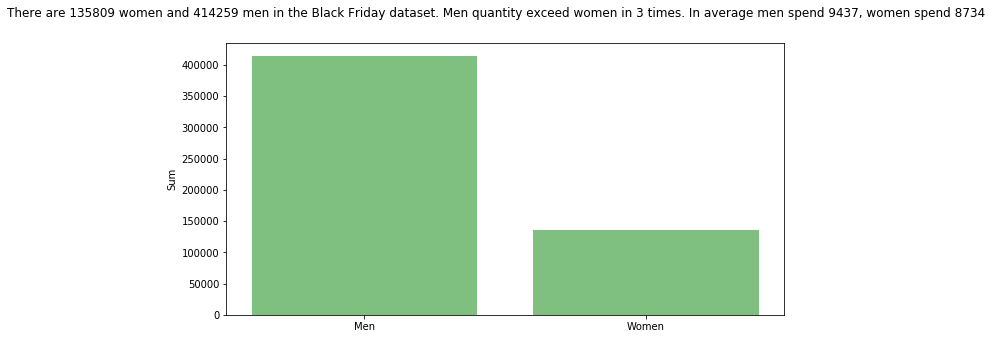

In [12]:
names = ['Men', 'Women']
values = data['Gender'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(names, values, linewidth=2.0, alpha=0.5, color='green')
plt.ylabel('Sum')
plt.suptitle(title)
plt.show()

##  Supportive attribute 1 - Age investigation

Our first supportive attribute is Age. 

First of all, we want to see age categories and their values in the selected dataset. 

During the second step, we are importing plotly to be able to build a comparative chart. 

In the third step, we define labels, data values, charter schemes, and in the final step, we show the result. 

As can be seen, the group that has the most occurrence in our data set is 26-35. What makes sense since its one of the most popular buying age group.

In [13]:
data_men['Age'].value_counts()

26-35    168835
36-45     82843
18-25     75032
46-50     32502
51-55     28607
55+       16421
0-17      10019
Name: Age, dtype: int64

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['26-35', '36-45', '18-25', '46-50 ', '51-55', '55+', '0-17']
men = data_men['Age'].value_counts()
women = data_women['Age'].value_counts()

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Men', 'Women'])

fig.add_trace(go.Pie(labels=labels, values=men, scalegroup='one',), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=women, scalegroup='one'), 1, 2)

fig.update_layout(title_text='Age categories ang gender')

fig.show()

##  Supportive attribute 2 - Stay_In_Current_City_Years

Our second supportive group is Stay_In_Current_City_Years. We have chosen this group to watch if the city_years can influence buying behavior.

First of all, we watch the categories and their appearance in the dataset. 

Then we define data and connect 'Stay_In_Current_City_Years' category with Product Categories. We do this to see the dependencies and relationships. 

Afterward, we are connecting 'Stay_In_Current_City_Years' with gender and products to be able to see our key and supportive attributes relationship/dependencies.

In [15]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
data_for_city = data
data_for_city['Products'] = data_for_city['Product_Category_1']+ data_for_city['Product_Category_2'] + data_for_city['Product_Category_3']

In [17]:
data_for_city.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Products  
0                   0                   0      8370         3  
1                   6                  14     15200        21  
2                   0                   0      1422        12  
3                  14                   0      1057        26  
4                   0                   0      7969         8

In [18]:
products_one_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '1'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)
products_second_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '2'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_third_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '3'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_four_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '4+'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)

products_zero_year = data_for_city[data_for_city['Stay_In_Current_City_Years'] 
                                  == '0'].groupby('Gender')['Products'].sum().reset_index().sort_values(by='Products',
                                                                                                         ascending=False).head(10)




Now we want to see the relationship between gender and products of people were living for one year in the current city. As can be seen, men purchased more than women.

In [19]:
products_one_year

Gender  Products
1      M   2288074
0      F    812789

It's time to watch all categories and attributes. We perform pd.concat operation to show all accessed data analysis. 

As can be seen, most purchases occurred during the first year by the male. We also found it's interesting, cause it makes more sense to purchase when you are just moved. 

The reason for this difference can be a) acknowledgment of newly moved people about black Friday places; b) financial hard time due to relocation. 

In [20]:
products_one_year = products_one_year.rename(columns={'Gender': 'Gender_one_year'}).reset_index(drop=True)
products_second_year = products_second_year.rename(columns={'Gender': 'Gender_two_years'}).reset_index(drop=True)
products_third_year = products_third_year.rename(columns={'Gender': 'Gender_third_years'}).reset_index(drop=True)
products_four_year = products_four_year.rename(columns={'Gender': 'Gender_more_4_year'}).reset_index(drop=True)
products_zero_year = products_zero_year.rename(columns={'Gender': 'Gender_zero_year'}).reset_index(drop=True)

In [21]:
all_categories = pd.concat([products_one_year, products_second_year,
                            products_third_year, products_four_year, products_zero_year], axis=1, sort=False)

In [22]:
all_categories

Gender_one_year  Products Gender_two_years  Products Gender_third_years  \
0               M   2288074                M   1239485                  M   
1               F    812789                F    389156                  F   

   Products Gender_more_4_year  Products Gender_zero_year  Products  
0   1130170                  M   1057621                M    914808  
1    387230                  F    299768                F    271892

## Product category investigation

Product category is not our key or supportive attribute, nevertheless, we fount it interesting to watch for the most popular item (product) among others purchased during Black Friday. 

To be able to find out this information, we had to:

a) use groupby function for product ID & product categories; 

b) find out the best product in each category (1,2,3) by using the leveling of index/parameters; 

c) visualize results in the form of a comparative table. 

As it can be seen, the most popular products are:
    
    1. Category 1 - P00255842
    2. Category 2 - P00058042
    3. Category 3 - P00184942
    
We think it's a shame that we do not know the names of products, so we can not go further than this here. 

In [23]:
#group products categories
products_1cat = data[data['Product_Category_1'] 
                                 > 0].groupby('Product_ID')['Product_Category_1'].sum().reset_index().sort_values(by='Product_Category_1', ascending=False).head(10)

products_2cat = data[data['Product_Category_2'] 
                                 > 0].groupby('Product_ID')['Product_Category_2'].sum().reset_index().sort_values(by='Product_Category_2', ascending=False).head(10)

products_3cat = data[data['Product_Category_3'] 
                                 > 0].groupby('Product_ID')['Product_Category_3'].sum().reset_index().sort_values(by='Product_Category_3', ascending=False).head(10)

In [24]:
best_1cat = products_1cat.rename(columns={'Product_ID': 'Product_Category1_ID'}).reset_index(drop=True)
best_2cat = products_2cat.rename(columns={'Product_ID': 'Product_Category2_ID'}).reset_index(drop=True)
best_3cat = products_3cat.rename(columns={'Product_ID': 'Product_Category3_ID'}).reset_index(drop=True)                         

In [25]:
all_products = pd.concat([best_1cat, best_2cat, best_3cat], axis=1, sort=False)

In [26]:
colors = sns.light_palette('green',as_cmap=True)
table = all_products.style.background_gradient(cmap=colors)
table

## City/Occupation investigation

We also did not have any information about City Category in DataSet, nevertheless, we decided to see which city occurred the most during the purchase cycle, and this is City B.

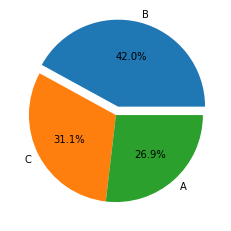

In [27]:
plt.pie(data['City_Category'].value_counts(),labels=['B', 'C', 'A'],autopct='%1.1f%%',explode = [0.1, 0.0, 0.0] )
plt.show()

## KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Model_v1 - with main and supportive attributes.
Product_ID,    User_ID, Purchase - has to be deleted - unique items. 

We also delete these attributes:

Occupation - int 

City_Category - A,B,C

Product_Category_1,2,3 - int

due to we want to start with only three attributes 


#### Data for KNN

- Gender - must be replaced by integers (numbers of categories) - otherwise the algorithm will fail.
Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories)
Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Marital_Status - int (1,0) - our target

In [28]:
X = data.drop(columns=['User_ID', 'Product_ID',
                        'Occupation','City_Category','Marital_Status', 
                       'Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase']) 

#replace age categories to digits
X["Age"] = X['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
X["Stay_In_Current_City_Years"] = X['Stay_In_Current_City_Years'].replace({'4+': 4})
X["Gender"] = X['Gender'].replace({'M': 0, 'F': 1})

X.head(3)

Gender  Age Stay_In_Current_City_Years  Products
0       1    1                          2         3
1       1    1                          2        21
2       1    1                          2        12

In [29]:
#Estimate Gender as a target and check
target = data['Marital_Status'].values
target[10:25]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
#Establish 70% training and 30% test
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.3, 
                                                              random_state=1, stratify=target)

In [31]:
#Pick algorithm for training set - KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [32]:
#Look at the score
KNN.score(X_test, target_test)

0.644378594239521

In [33]:
#Look at the prediction. Predict the class labels for the provided data
KNN.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
#Try different parametrs
KNN = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree',weights='distance')
KNN.fit(X_train, target_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [35]:
#Look at the score again
KNN.score(X_test, target_test)

0.645257270286812

#### Conclusion
Score function returns the mean accuracy on the given test data and labels. As we can see in our data analysis, with the first set of parameters we got 64.4% accuracy, with the second we obtained 65.4%. It's not the best result that we want to have. So, it's better to use all possible attributes.

### Model_v2 with all attributes

Product_ID,    User_ID - has to be deleted => unique items

Data for KNN

- Gender - must be replaced by integers (numbers of categories) Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories) Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Occupation - int

- City_Category - must be replaced by intagers'A': 1, 'B': 2, 'C': 3

- Stay_In_Current_City_Years - int

- Product_Category  - the sum of all categories(1,2,3) - int - we fold these categories to get the final number of all products purchased by a person

- Purchase - must be changed (log), overwise it can influence on the model 

- Marital_Status - int (1,0) - our target

In [36]:
X2 = data.drop(columns=['User_ID', 'Product_ID', 'Marital_Status'])

#replace
X2["Age"] = X2['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X2["City_Category"] = X2['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X2["Stay_In_Current_City_Years"] = X2['Stay_In_Current_City_Years'].replace({'4+': 4})
X2['Purchase'] = np.log(X2['Purchase'])
X2['Products'] = X2['Product_Category_1']+ X2['Product_Category_2'] + X2['Product_Category_3']
X2["Gender"] = X2['Gender'].replace({'M': 0, 'F': 1})

X2.drop(columns = ['Product_Category_1', 'Product_Category_2','Product_Category_3'], inplace=True)
X2.head(3)

Gender  Age  Occupation  City_Category Stay_In_Current_City_Years  \
0       1    1          10              1                          2   
1       1    1          10              1                          2   
2       1    1          10              1                          2   

   Purchase  Products  
0  9.032409         3  
1  9.629051        21  
2  7.259820        12

In [37]:
target2 = data['Marital_Status'].values

In [38]:
X2_train, X2_test, target2_train, target2_test = train_test_split(X2, target2, test_size=0.3, 
                                                              random_state=1, stratify=target2)

In [39]:
KNN2 = KNeighborsClassifier(n_neighbors=5)
KNN2.fit(X2_train, target2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
KNN2.score(X2_test, target_test)

0.7759073087667631

As you can see, compared to previous model, the percentage is much higher (65% before => almost 78% now)

In [41]:
#Add parametrs to KNeighborsClassifie
#algorithm = 'kd_tree'
#leaf_size = 20
KNN2_feature = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size = 20)
KNN2_feature.fit(X2_train, target2_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
KNN2_feature.score(X2_test, target2_test)

0.775846710418674

#### Conclusion
Our score has become better since we decided to use all possible attributes. With the only three attributes, we got a maximum 65.4% accuracy. With all attributes, the score has reached 77.59%. Hence, some added attributes influence the score dramatically.

### Model_v3 with aggrigation (by User ID)

It's easy to notice that some users have purchased more than one time. Consequently, we can aggregate all the products bought by each customer. Perhaps, we can get a better score.


Data for KNN

- Gender - must be replaced by integers (numbers of categories) Replace by: 'M': 0, 'F': 1

- Age - must be replaced by integers (numbers of categories) Replace by: '0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7

- Stay_In_Current_City_Years - int

- Occupation - int

- City_Category - must be replaced by intagers'A': 1, 'B': 2, 'C': 3

- Stay_In_Current_City_Years - int

- Product_Category(1,2,3) - int - number of products in each category

- Purchase - must be changed (log), overwise it can influence on the model

- Marital_Status - int (1,0) - our target

In [43]:
#prepare data. Step 1: groupby ID
data_unique_id = data[['User_ID','Gender','Age', 'City_Category', 
                              'Occupation', 'Stay_In_Current_City_Years', 
                       'Marital_Status']]
data_unique_id = data_unique_id.groupby('User_ID').first().reset_index()

In [44]:
data_unique_id

User_ID Gender    Age City_Category  Occupation  \
0     1000001      F   0-17             A          10   
1     1000002      M    55+             C          16   
2     1000003      M  26-35             A          15   
3     1000004      M  46-50             B           7   
4     1000005      M  26-35             A          20   
...       ...    ...    ...           ...         ...   
5886  1006036      F  26-35             B          15   
5887  1006037      F  46-50             C           1   
5888  1006038      F    55+             C           1   
5889  1006039      F  46-50             B           0   
5890  1006040      M  26-35             B           6   

     Stay_In_Current_City_Years  Marital_Status  
0                             2               0  
1                            4+               0  
2                             3               0  
3                             2               1  
4                             1               1  
...                         ...             ...  
5886                         4+               1  
5887                         4+               0  
5888                          2               0  
5889                         4+               1  
5890                          2               0  

[5891 rows x 7 columns]

In [45]:
#prepare data. Step 2: sum of products in each category and all purchases
dict_users = data[['User_ID','Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
dict_users = dict_users.groupby('User_ID').agg(lambda x: x.sum()).reset_index()

In [46]:
#prepare data. Step 3: merge sets by User_ID
set_for_X3 = dict_users.merge(data_unique_id,on='User_ID')

In [47]:
set_for_X3.head()

User_ID  Product_Category_1  Product_Category_2  Product_Category_3  \
0  1000001                 213                 132                 148   
1  1000002                 354                 539                 359   
2  1000003                  93                 117                 148   
3  1000004                  33                 102                 127   
4  1000005                 659                 642                 207   

   Purchase Gender    Age City_Category  Occupation  \
0    334093      F   0-17             A          10   
1    810472      M    55+             C          16   
2    341635      M  26-35             A          15   
3    206468      M  46-50             B           7   
4    821001      M  26-35             A          20   

  Stay_In_Current_City_Years  Marital_Status  
0                          2               0  
1                         4+               0  
2                          3               0  
3                          2               1  
4                          1               1

In [66]:
#prepare data. Step 3: replace and divide into data and target
X3 = set_for_X3.drop(columns=['User_ID', 'Marital_Status']) 
X3["Age"] = X3['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X3["City_Category"] = X3['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X3["Stay_In_Current_City_Years"] = X3['Stay_In_Current_City_Years'].replace({'4+': 4})
X3['Purchase'] = np.log2(X3['Purchase'])
X3["Gender"] = X3['Gender'].replace({'M': 0, 'F': 1})


target3 = set_for_X3['Marital_Status'].values

In [67]:
X3.head(3)

Product_Category_1  Product_Category_2  Product_Category_3   Purchase  \
0                 213                 132                 148  18.349890   
1                 354                 539                 359  19.628403   
2                  93                 117                 148  18.382096   

   Gender  Age  City_Category  Occupation Stay_In_Current_City_Years  
0       1    1              1          10                          2  
1       0    7              3          16                          4  
2       0    3              1          15                          3

In [68]:
X3_train, X3_test, target3_train, target3_test = train_test_split(X3, target3, test_size=0.3, 
                                                              random_state=1, stratify=target3)

In [69]:
KNN3 = KNeighborsClassifier(n_neighbors=10)
KNN3.fit(X3_train, target3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [70]:
KNN3.score(X3_test, target3_test)

0.5554298642533937

#### Conclusion
Even though we used all attributes, aggregation by User ID harmed our results. 
In comparison, result with all attributes without aggregation by User ID was 77.59%, after the aggregation score has dropped to 55.55% accuracy. We can conclude that:
- the more data we have the better score we will get 
- aggregation by User ID is not a better decision for the prediction of Marital status/Gender. However, it can be the appropriate choice for searching the nearest neighbors and product category prediction.

## Decision tree
We can try another algorithm and compare results

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model_v1 with key and supprotive attributes

In [71]:
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics as metrics
Data_tree = data.drop(columns=['User_ID','Product_ID', 'Marital_Status']) 


Data_tree["Age"] = Data_tree['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
Data_tree["City_Category"] = Data_tree['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].replace({'4+': 4})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].astype(int)
Data_tree["Gender"] = Data_tree['Gender'].replace({'M': 0, 'F': 1})


Data_tree.head(3)

Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    1          10              1                           2   
1       1    1          10              1                           2   
2       1    1          10              1                           2   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   

   Products  
0         3  
1        21  
2        12

In [72]:
#Pick only colomns we need
feature_cols = ['Age', 'Gender', 'Stay_In_Current_City_Years']
X_tree = Data_tree[feature_cols] # Features
y_tree = data['Marital_Status'].values # Target 

In [73]:
X_tree.head()

Age  Gender  Stay_In_Current_City_Years
0    1       1                           2
1    1       1                           2
2    1       1                           2
3    1       1                           2
4    7       0                           4

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1) 

In [75]:
#Pick algorithm for training set - DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6687997285194006


### Model_v2 with all attributes

In [78]:
Data_tree = data.drop(columns=['User_ID','Product_ID', 'Marital_Status']) 

#replace age categories to digits
Data_tree["Age"] = Data_tree['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
Data_tree["City_Category"] = Data_tree['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].replace({'4+': 4})
Data_tree["Stay_In_Current_City_Years"] = Data_tree['Stay_In_Current_City_Years'].astype(int)
Data_tree["Gender"] = Data_tree['Gender'].replace({'M': 0, 'F': 1})


Data_tree.head(3)

Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    1          10              1                           2   
1       1    1          10              1                           2   
2       1    1          10              1                           2   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   6                  14     15200   
2                  12                   0                   0      1422   

   Products  
0         3  
1        21  
2        12

In [79]:
X_tree = Data_tree
y_tree = data['Marital_Status'].values # Target 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1) 

In [81]:
clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7704898164476036


In [83]:
#Tuning some parameters
clf_tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4)
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7852394543724738


#### Conclusion
We have compared two algorithms - DecisionTreeClassifier and KNeighborsClassifier and got these results:

Accuracy with key and supportive attributes:
- DecisionTreeClassifier - 66.8%
- KNeighborsClassifier - 65.4%

Accuracy with all attributes
- DecisionTreeClassifier - 77%
- KNeighborsClassifier - 78.5%


DecisionTreeClassifier had better scores in all categories. However, it is possible to obtain better results with at least these features:
- tuning parameters in the algorithms (change them and test)
- changing values in splitting data (in our case we have 30/70)
- using all possible attributes 
- change attributes that have significant differences (like Purchases in our data set that influence on result due to its big value). For example, via np.log2
- normalize data if it possible 

We can also recommend using an algorithm for meta parameters tuning that will help to find better parameters for algorithms and pick an appropriate algorithm as well.

## Model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [20]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm


In [12]:
X = data.drop(columns=['User_ID', 'Product_ID',
                        'Occupation','City_Category','Marital_Status', 
                       'Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase']) 

#replace age categories to digits
X["Age"] = X['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
X["Stay_In_Current_City_Years"] = X['Stay_In_Current_City_Years'].replace({'4+': 4})
X["Gender"] = X['Gender'].replace({'M': 0, 'F': 1})

X.head(3)

Gender  Age Stay_In_Current_City_Years
0       1    1                          2
1       1    1                          2
2       1    1                          2

In [16]:
X_score = np.array(X)
y_score = np.array(data['Marital_Status'])

In [17]:
y_score

array([0, 0, 0, ..., 1, 0, 1])

In [21]:
clf = DecisionTreeClassifier()
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(clf, X_score, y_score, scoring=scoring,
                         cv=5, return_train_score=True)
print(scores.keys())
print(scores['test_acc'])  

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.67156297 0.66874216 0.67049349 0.66767564 0.67050258]


In [25]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_score, y_score, cv=10)

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.00)


Scores in folders are almost the same. That means, we can take each sample of the given data (appropriate size) and results will be same 

## Metaparameter tuning - GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

For DecisionTreeClassifier

In [93]:
X_score, y_score = make_classification(n_samples=100, #Generate a random n-class classification problem
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


dtc = DecisionTreeClassifier(max_features= 'sqrt', min_samples_split=2) 

param_grid = { 
    'min_samples_split': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Exhaustive search over specified parameter values for an estimator
CV_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5) 
CV_rfc.fit(X_score, y_score)
print('Best papameters for DecisionTreeClassifier:', CV_rfc.best_params_)

Best papameters for DecisionTreeClassifier: {'max_features': 'sqrt', 'min_samples_split': 20}


In [88]:
print("Best parameter (CV score=%0.3f)" % CV_rfc.best_score_)

Best parameter (CV score=0.630)


For KNeighborsClassifier

In [94]:
X_score, y_score = make_classification(n_samples=100, #Generate a random n-class classification problem
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


KNC = KNeighborsClassifier(n_neighbors=5, algorithm = 'kd_tree') 

param_grid = { 
    'n_neighbors': [10, 50],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

CV_rfc = GridSearchCV(estimator=KNC, param_grid=param_grid, cv=5)
CV_rfc.fit(X_score, y_score)
print('Best papameters for KNeighborsClassifier:', CV_rfc.best_params_)

Best papameters for KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 10}
